In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [49]:
batting_df = pd.read_csv('final_data/batting_data.csv')
batting_df

player_id  Runs Mins  BF 4s 6s      SR Pos Dismissal Inns    Opposition  \
0        440970     0    -   3  0  0    0.00   3    caught    2         Kenya   
1        440970   13*    -  19  0  0   68.42   5   not out    2         Kenya   
2        440970   38*    -  67  4  0   56.71   4   not out    2     Hong Kong   
3        440970     3    -   7  0  0   42.85   4       lbw    1        U.A.E.   
4        440970    15   21  22  2  0   68.18   4    caught    1      Zimbabwe   
...         ...   ...  ...  .. .. ..     ...  ..       ...  ...           ...   
9326     793007    4*    4   2  1  0  200.00  11   not out    2  South Africa   
9327     793007   DNB    -   -  -  -       -   -         -    1      Pakistan   
9328     793007    0*   12   6  0  0    0.00  11   not out    1     Australia   
9329     793007   DNB    -   -  -  -       -   -         -    2   Netherlands   
9330     793007  TDNB    -   -  -  -       -   -         -    -       England   

            Ground        Start  odi_number  
0          Sharjah   2 Oct 2013  ODI # 3417  
1          Sharjah   4 Oct 2013  ODI # 3418  
2     Kuala Lumpur   1 May 2014  ODI # 3487  
3     Kuala Lumpur   2 May 2014  ODI # 3488  
4         Bulawayo  18 Jul 2014  ODI # 3503  
...            ...          ...         ...  
9326         Delhi   7 Oct 2023  ODI # 4661  
9327     Hyderabad  10 Oct 2023  ODI # 4665  
9328       Lucknow  16 Oct 2023  ODI # 4671  
9329       Lucknow  21 Oct 2023  ODI # 4676  
9330     Bengaluru  26 Oct 2023  ODI # 4682  

[9331 rows x 14 columns]

In [50]:
bowling_df = pd.read_csv('final_data/bowling_data.csv')
bowling_df

player_id overs maidens runs wickets economy position innings  \
0        440970   DNB       -    -       -       -        -       1   
1        440970   DNB       -    -       -       -        -       1   
2        440970   DNB       -    -       -       -        -       1   
3        440970   2.0       0   17       0    8.50        6       2   
4        440970   DNB       -    -       -       -        -       2   
...         ...   ...     ...  ...     ...     ...      ...     ...   
9326     793007  10.0       0   86       2    8.60        2       1   
9327     793007   9.2       0   60       2    6.42        2       2   
9328     793007   9.0       2   38       3    4.22        2       2   
9329     793007   9.4       1   49       4    5.06        1       1   
9330     793007   5.0       0   37       0    7.40        1       1   

        opposition        ground   start_date  odi_number  
0            Kenya       Sharjah   2 Oct 2013  ODI # 3417  
1            Kenya       Sharjah   4 Oct 2013  ODI # 3418  
2        Hong Kong  Kuala Lumpur   1 May 2014  ODI # 3487  
3           U.A.E.  Kuala Lumpur   2 May 2014  ODI # 3488  
4         Zimbabwe      Bulawayo  18 Jul 2014  ODI # 3503  
...            ...           ...          ...         ...  
9326  South Africa         Delhi   7 Oct 2023  ODI # 4661  
9327      Pakistan     Hyderabad  10 Oct 2023  ODI # 4665  
9328     Australia       Lucknow  16 Oct 2023  ODI # 4671  
9329   Netherlands       Lucknow  21 Oct 2023  ODI # 4676  
9330       England     Bengaluru  26 Oct 2023  ODI # 4682  

[9331 rows x 12 columns]

In [51]:
player_data_df = pd.read_csv('final_data/player_team_name_id.csv')
player_data_df

team_name           player_name  player_id
0    Afghanistan  Hashmatullah Shahidi     440970
1    Afghanistan    Rahmanullah Gurbaz     974087
2    Afghanistan        Ibrahim Zadran     921509
3    Afghanistan          Reyaz Hassan    1061090
4    Afghanistan   Rahmat Shah Zurmati     533956
..           ...                   ...        ...
145    Sri Lanka      Dunith Wellalage    1152427
146    Sri Lanka         Kasun Rajitha     499594
147    Sri Lanka   Matheesha Pathirana    1194795
148    Sri Lanka         Lahiru Kumara     784375
149    Sri Lanka    Dilshan Madushanka     793007

[150 rows x 3 columns]

In [52]:
# Collect Team Names

team_names = player_data_df['team_name'].unique().tolist()
team_names += bowling_df['opposition'].unique().tolist()
team_names += batting_df['Opposition'].unique().tolist()
team_names = list(set(team_names))
team_names

# Encode Team Names

le = LabelEncoder()
le.fit(team_names)
batting_df['Opposition'] = le.transform(batting_df['Opposition'])
bowling_df['opposition'] = le.transform(bowling_df['opposition'])
player_data_df['team_name'] = le.transform(player_data_df['team_name'])


In [53]:
batting_df = batting_df.merge(player_data_df, on='player_id', how='left')
batting_df

player_id  Runs Mins  BF 4s 6s      SR Pos Dismissal Inns  Opposition  \
0        440970     0    -   3  0  0    0.00   3    caught    2           9   
1        440970   13*    -  19  0  0   68.42   5   not out    2           9   
2        440970   38*    -  67  4  0   56.71   4   not out    2           6   
3        440970     3    -   7  0  0   42.85   4       lbw    1          18   
4        440970    15   21  22  2  0   68.18   4    caught    1          21   
...         ...   ...  ...  .. .. ..     ...  ..       ...  ...         ...   
9326     793007    4*    4   2  1  0  200.00  11   not out    2          16   
9327     793007   DNB    -   -  -  -       -   -         -    1          14   
9328     793007    0*   12   6  0  0    0.00  11   not out    1           1   
9329     793007   DNB    -   -  -  -       -   -         -    2          11   
9330     793007  TDNB    -   -  -  -       -   -         -    -           5   

            Ground        Start  odi_number  team_name           player_name  
0          Sharjah   2 Oct 2013  ODI # 3417          0  Hashmatullah Shahidi  
1          Sharjah   4 Oct 2013  ODI # 3418          0  Hashmatullah Shahidi  
2     Kuala Lumpur   1 May 2014  ODI # 3487          0  Hashmatullah Shahidi  
3     Kuala Lumpur   2 May 2014  ODI # 3488          0  Hashmatullah Shahidi  
4         Bulawayo  18 Jul 2014  ODI # 3503          0  Hashmatullah Shahidi  
...            ...          ...         ...        ...                   ...  
9326         Delhi   7 Oct 2023  ODI # 4661         17    Dilshan Madushanka  
9327     Hyderabad  10 Oct 2023  ODI # 4665         17    Dilshan Madushanka  
9328       Lucknow  16 Oct 2023  ODI # 4671         17    Dilshan Madushanka  
9329       Lucknow  21 Oct 2023  ODI # 4676         17    Dilshan Madushanka  
9330     Bengaluru  26 Oct 2023  ODI # 4682         17    Dilshan Madushanka  

[9331 rows x 16 columns]

In [54]:
batting_df['player_id'].value_counts()
# Valid

player_id
253802     286
56029      261
34102      256
56143      244
56025      225
          ... 
721041       4
819507       3
1139520      2
35281        2
379887       2
Name: count, Length: 150, dtype: int64

In [55]:
batting_df

player_id  Runs Mins  BF 4s 6s      SR Pos Dismissal Inns  Opposition  \
0        440970     0    -   3  0  0    0.00   3    caught    2           9   
1        440970   13*    -  19  0  0   68.42   5   not out    2           9   
2        440970   38*    -  67  4  0   56.71   4   not out    2           6   
3        440970     3    -   7  0  0   42.85   4       lbw    1          18   
4        440970    15   21  22  2  0   68.18   4    caught    1          21   
...         ...   ...  ...  .. .. ..     ...  ..       ...  ...         ...   
9326     793007    4*    4   2  1  0  200.00  11   not out    2          16   
9327     793007   DNB    -   -  -  -       -   -         -    1          14   
9328     793007    0*   12   6  0  0    0.00  11   not out    1           1   
9329     793007   DNB    -   -  -  -       -   -         -    2          11   
9330     793007  TDNB    -   -  -  -       -   -         -    -           5   

            Ground        Start  odi_number  team_name           player_name  
0          Sharjah   2 Oct 2013  ODI # 3417          0  Hashmatullah Shahidi  
1          Sharjah   4 Oct 2013  ODI # 3418          0  Hashmatullah Shahidi  
2     Kuala Lumpur   1 May 2014  ODI # 3487          0  Hashmatullah Shahidi  
3     Kuala Lumpur   2 May 2014  ODI # 3488          0  Hashmatullah Shahidi  
4         Bulawayo  18 Jul 2014  ODI # 3503          0  Hashmatullah Shahidi  
...            ...          ...         ...        ...                   ...  
9326         Delhi   7 Oct 2023  ODI # 4661         17    Dilshan Madushanka  
9327     Hyderabad  10 Oct 2023  ODI # 4665         17    Dilshan Madushanka  
9328       Lucknow  16 Oct 2023  ODI # 4671         17    Dilshan Madushanka  
9329       Lucknow  21 Oct 2023  ODI # 4676         17    Dilshan Madushanka  
9330     Bengaluru  26 Oct 2023  ODI # 4682         17    Dilshan Madushanka  

[9331 rows x 16 columns]

In [56]:
# We can notice *, DNB, TDNB, absent in runs

# Replace *23 with 23
batting_df['Runs'].replace(to_replace='\*', value='', regex=True, inplace=True)
batting_df['Runs'].unique()

array(['0', '13', '38', '3', '15', '11', '31', '32', '72', '14', '21',
       '2', '12', '23', '54', '34', '37', '58', '97', '71', '9', '52',
       '59', '47', '18', '4', '8', '76', '82', '10', '73', '28', '5',
       '88', '1', '57', '22', '51', '80', '48', '127', '103', '7', '106',
       '17', '53', '68', '145', '6', '151', '65', '19', '121', '162',
       '98', '41', '100', '75', '87', '50', '35', 'DNB', '26', '16', '30',
       '36', '78', '108', 'TDNB', '44', '114', '43', '56', '69', '29',
       '33', '113', '62', '46', '24', '61', '70', '94', '55', '45', '77',
       '83', '25', '89', '81', '67', '63', '42', '20', '104', '60', '116',
       '40', '49', '27', '92', '64', '86', '39', '117', '85', '99', '128',
       '96', '101', '152', '124', '102', '79', '66', '93', '95', '146',
       '74', '163', '178', '84', '122', '109', '173', '119', '156', '130',
       '179', '107', '166', '134', '105', 'absent', '126', '176', '136',
       '90', '110', '144', '125', '111', '112', 'sub',

In [57]:
# Remove rows with DNB, TDNB, absent, sub

batting_df.drop(batting_df[batting_df['Runs'].isin(['DNB', 'TDNB', 'absent', 'sub'])].index, inplace=True)
batting_df

player_id Runs Mins  BF 4s 6s      SR Pos Dismissal Inns  Opposition  \
0        440970    0    -   3  0  0    0.00   3    caught    2           9   
1        440970   13    -  19  0  0   68.42   5   not out    2           9   
2        440970   38    -  67  4  0   56.71   4   not out    2           6   
3        440970    3    -   7  0  0   42.85   4       lbw    1          18   
4        440970   15   21  22  2  0   68.18   4    caught    1          21   
...         ...  ...  ...  .. .. ..     ...  ..       ...  ...         ...   
9321     793007    4    7   2  1  0  200.00  11   not out    2          12   
9322     793007    1    6   5  0  0   20.00  11   not out    1          11   
9325     793007    0    2   0  0  0       -  11   not out    1          11   
9326     793007    4    4   2  1  0  200.00  11   not out    2          16   
9328     793007    0   12   6  0  0    0.00  11   not out    1           1   

            Ground        Start  odi_number  team_name           player_name  
0          Sharjah   2 Oct 2013  ODI # 3417          0  Hashmatullah Shahidi  
1          Sharjah   4 Oct 2013  ODI # 3418          0  Hashmatullah Shahidi  
2     Kuala Lumpur   1 May 2014  ODI # 3487          0  Hashmatullah Shahidi  
3     Kuala Lumpur   2 May 2014  ODI # 3488          0  Hashmatullah Shahidi  
4         Bulawayo  18 Jul 2014  ODI # 3503          0  Hashmatullah Shahidi  
...            ...          ...         ...        ...                   ...  
9321      Auckland  25 Mar 2023  ODI # 4548         17    Dilshan Madushanka  
9322      Bulawayo  30 Jun 2023  ODI # 4606         17    Dilshan Madushanka  
9325        Harare   9 Jul 2023  ODI # 4620         17    Dilshan Madushanka  
9326         Delhi   7 Oct 2023  ODI # 4661         17    Dilshan Madushanka  
9328       Lucknow  16 Oct 2023  ODI # 4671         17    Dilshan Madushanka  

[7351 rows x 16 columns]

In [58]:
batting_df['BF'] = batting_df['BF'].astype(int)

In [59]:
batting_df['Pos'] = batting_df['Pos'].astype(int)

In [60]:
batting_df['Dismissal'].value_counts()

Dismissal
caught            3730
not out           1395
bowled            1082
lbw                602
run out            375
stumped            145
retired notout      15
hit wicket           6
obstruct field       1
Name: count, dtype: int64

In [61]:
batting_df['Pos'] = batting_df['Pos'].astype(int)

In [62]:
batting_df['Ground'].value_counts()

Ground
Mirpur           467
Colombo (RPS)    321
Harare           237
Pallekele        187
The Oval         169
                ... 
Toronto            1
Jamshedpur         1
Gwalior            1
Lincoln            1
Ayr                1
Name: count, Length: 128, dtype: int64

In [63]:
# Collect Ground Names

ground_names = batting_df['Ground'].unique().tolist()
ground_names += bowling_df['ground'].unique().tolist()
ground_names = list(set(ground_names))
ground_names

['Dublin (Malahide)',
 'Nagpur',
 'Benoni',
 'Bogra',
 'Hambantota',
 'Adelaide',
 'Dunedin',
 'Kingstown',
 'Nelson',
 'Canberra',
 'Kuala Lumpur',
 'Gqeberha',
 'Abu Dhabi',
 'Rotterdam',
 'Brisbane',
 'Melbourne',
 'Kanpur',
 'Hamilton',
 'Brabourne',
 'Doha',
 'Leeds',
 'Potchefstroom',
 'Edinburgh',
 'The Oval',
 'Tarouba',
 'Chester-le-Street',
 'Cardiff',
 'Colombo (RPS)',
 'Delhi',
 'Roseau',
 'Bristol',
 'Darwin',
 'Rawalpindi',
 'Bulawayo',
 'Ayr',
 'Glasgow',
 'Multan',
 'Colombo (PSS)',
 'Pune',
 'Kochi',
 'Manchester',
 'Chattogram',
 'Albion',
 'Pallekele',
 'Wankhede',
 'Wellington',
 'Castries',
 'Greater Noida',
 "St George's",
 'Auckland',
 'Napier',
 'Ranchi',
 'Fatullah',
 'Taunton',
 'Dublin',
 'Dambulla',
 'Basseterre',
 "Lord's",
 'Hobart',
 'Birmingham',
 'Galle',
 'Mohali',
 'Kimberley',
 'Khulna',
 'Utrecht',
 'Indore',
 'Aberdeen',
 'Port of Spain',
 'Visakhapatnam',
 'Mirpur',
 'Durban',
 'Cape Town',
 'Lucknow',
 'Hyderabad',
 'Nottingham',
 'King City (NW)

In [64]:
ge = LabelEncoder()
ge.fit(ground_names)
batting_df['Ground'] = ge.transform(batting_df['Ground'])
bowling_df['ground'] = ge.transform(bowling_df['ground'])

In [65]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7351 entries, 0 to 9328
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   object
 2   Mins         7351 non-null   object
 3   BF           7351 non-null   int32 
 4   4s           7351 non-null   object
 5   6s           7351 non-null   object
 6   SR           7351 non-null   object
 7   Pos          7351 non-null   int32 
 8   Dismissal    7351 non-null   object
 9   Inns         7351 non-null   object
 10  Opposition   7351 non-null   int32 
 11  Ground       7351 non-null   int32 
 12  Start        7351 non-null   object
 13  odi_number   7351 non-null   object
 14  team_name    7351 non-null   int32 
 15  player_name  7351 non-null   object
dtypes: int32(5), int64(1), object(10)
memory usage: 832.7+ KB


In [66]:
batting_df

player_id Runs Mins  BF 4s 6s      SR  Pos Dismissal Inns  Opposition  \
0        440970    0    -   3  0  0    0.00    3    caught    2           9   
1        440970   13    -  19  0  0   68.42    5   not out    2           9   
2        440970   38    -  67  4  0   56.71    4   not out    2           6   
3        440970    3    -   7  0  0   42.85    4       lbw    1          18   
4        440970   15   21  22  2  0   68.18    4    caught    1          21   
...         ...  ...  ...  .. .. ..     ...  ...       ...  ...         ...   
9321     793007    4    7   2  1  0  200.00   11   not out    2          12   
9322     793007    1    6   5  0  0   20.00   11   not out    1          11   
9325     793007    0    2   0  0  0       -   11   not out    1          11   
9326     793007    4    4   2  1  0  200.00   11   not out    2          16   
9328     793007    0   12   6  0  0    0.00   11   not out    1           1   

      Ground        Start  odi_number  team_name           player_name  
0        109   2 Oct 2013  ODI # 3417          0  Hashmatullah Shahidi  
1        109   4 Oct 2013  ODI # 3418          0  Hashmatullah Shahidi  
2         77   1 May 2014  ODI # 3487          0  Hashmatullah Shahidi  
3         77   2 May 2014  ODI # 3488          0  Hashmatullah Shahidi  
4         19  18 Jul 2014  ODI # 3503          0  Hashmatullah Shahidi  
...      ...          ...         ...        ...                   ...  
9321       6  25 Mar 2023  ODI # 4548         17    Dilshan Madushanka  
9322      19  30 Jun 2023  ODI # 4606         17    Dilshan Madushanka  
9325      61   9 Jul 2023  ODI # 4620         17    Dilshan Madushanka  
9326      38   7 Oct 2023  ODI # 4661         17    Dilshan Madushanka  
9328      82  16 Oct 2023  ODI # 4671         17    Dilshan Madushanka  

[7351 rows x 16 columns]

In [75]:
# # # Group details on batsmen
# # batgroup = batting_df.groupby(['player_name'])

# # # Create a batting dataframe with a summary statistics for each batsman
# # # batdf = pd.DataFrame(batgroup['ball'].count()).rename(columns={'ball':'balls_faced'})
# # batting_df['inns'] = batgroup['player_id'].nunique()
# # batting_df['runs'] = batgroup['Runs'].sum()
# # batting_df['4s'] = batting_df[batting_df['Runs'] == 4].groupby('player_name')['Runs'].count()
# # batting_df['4s'].fillna(0,inplace=True)
# # batting_df['6s'] = batting_df[batting_df['Runs'] == 6].groupby('player_name')['Runs'].count()
# # batting_df['6s'].fillna(0,inplace=True)

# # # Batting average = total rus scored/no. of times batsman is been dismissed
# # # Approximated here to matches instead of no. of dismissals
# # batting_df['bat_average'] = round(batting_df['runs']/batting_df['inns'],2)

# # # Strike Rate = (Runs Scored / Balls faced) * 100
# # # batdf['bat_strike'] = round(batdf['runs']/batdf['balls_faced']*100,2)


# import pandas as pd

# # Assuming you have a 'batting_df' DataFrame with columns like 'player_name', 'player_id', 'Runs'

# # Group details on batsmen
# batgroup = batting_df.groupby(['player_name'])

# # Create a batting dataframe with summary statistics for each batsman
# batting_summary = pd.DataFrame()
# batting_summary['inns'] = batgroup['player_id'].nunique()
# batting_summary['runs'] = batgroup['Runs'].sum().astype(float)  # Convert 'runs' to numeric

# # Counting 4s for each batsman
# batting_summary['4s'] = batting_df[batting_df['Runs'] == 4].groupby('player_name')['Runs'].count()
# batting_summary['4s'].fillna(0, inplace=True)

# # Counting 6s for each batsman
# batting_summary['6s'] = batting_df[batting_df['Runs'] == 6].groupby('player_name')['Runs'].count()
# batting_summary['6s'].fillna(0, inplace=True)

# # Batting average = total runs scored / number of innings
# # Avoid division by zero by setting innings to 1 if it is zero
# batting_summary['bat_average'] = round(batting_summary['runs'] / batting_summary['inns'].replace(0, 1), 2)

# # Display the resulting batting summary dataframe
# print(batting_summary)
# batting_summary

In [67]:
batting=batting_df[['player_id','Runs','Mins','BF','4s','6s','SR','Pos','Inns','Opposition','Ground','team_name']]

In [74]:
# import pandas as pd
# from sklearn.cluster import KMeans

# # Assuming you have a dataframe named 'your_dataframe' with the specified columns

# # Selecting the columns for k-means clustering
# selected_columns = ['player_id','Runs','Mins','BF','4s','6s','SR','Pos','Inns','Opposition','Ground','team_name']

# # Creating a k-means model
# kmeans_model = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters (3 in this example)

# # Fitting the model and getting cluster assignments
# batting_df['cluster'] = kmeans_model.fit_predict(batting_df[selected_columns])

# # Display the resulting dataframe with cluster assignments
# print(batting_df[['player_id', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Inns', 'odi_number', 'cluster']])


In [70]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have a dataframe named 'batting_df' with the specified columns

# Selecting the columns for k-means clustering
selected_columns = ['player_id', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Inns', 'Opposition', 'Ground', 'team_name']

# Handling non-numeric values
batting_df[selected_columns] = batting_df[selected_columns].replace('-', pd.NA)

# Converting to numeric, replacing non-numeric values with NaN
batting_df[selected_columns] = batting_df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Filling NaN values with a specific value (you can adjust this based on your needs)
batting_df[selected_columns] = batting_df[selected_columns].fillna(0)

# Scaling the selected columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(batting_df[selected_columns])

# Creating a k-means model
kmeans_model = KMeans(n_clusters=7, random_state=42)  # You can adjust the number of clusters (7 in this example)

# Fitting the model and getting cluster assignments
cluster_labels = kmeans_model.fit_predict(df_scaled)

# Adding the cluster labels to the original DataFrame
batting_df['cluster'] = cluster_labels

# Display the resulting dataframe with cluster assignments
print(batting_df[['player_id', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Inns', 'odi_number', 'cluster']])


      player_id  Runs  Mins  BF   4s   6s      SR  Pos  Inns  odi_number  \
0        440970     0   0.0   3  0.0  0.0    0.00    3     2  ODI # 3417   
1        440970    13   0.0  19  0.0  0.0   68.42    5     2  ODI # 3418   
2        440970    38   0.0  67  4.0  0.0   56.71    4     2  ODI # 3487   
3        440970     3   0.0   7  0.0  0.0   42.85    4     1  ODI # 3488   
4        440970    15  21.0  22  2.0  0.0   68.18    4     1  ODI # 3503   
...         ...   ...   ...  ..  ...  ...     ...  ...   ...         ...   
9321     793007     4   7.0   2  1.0  0.0  200.00   11     2  ODI # 4548   
9322     793007     1   6.0   5  0.0  0.0   20.00   11     1  ODI # 4606   
9325     793007     0   2.0   0  0.0  0.0    0.00   11     1  ODI # 4620   
9326     793007     4   4.0   2  1.0  0.0  200.00   11     2  ODI # 4661   
9328     793007     0  12.0   6  0.0  0.0    0.00   11     1  ODI # 4671   

      cluster  
0           6  
1           6  
2           6  
3           4  
4      

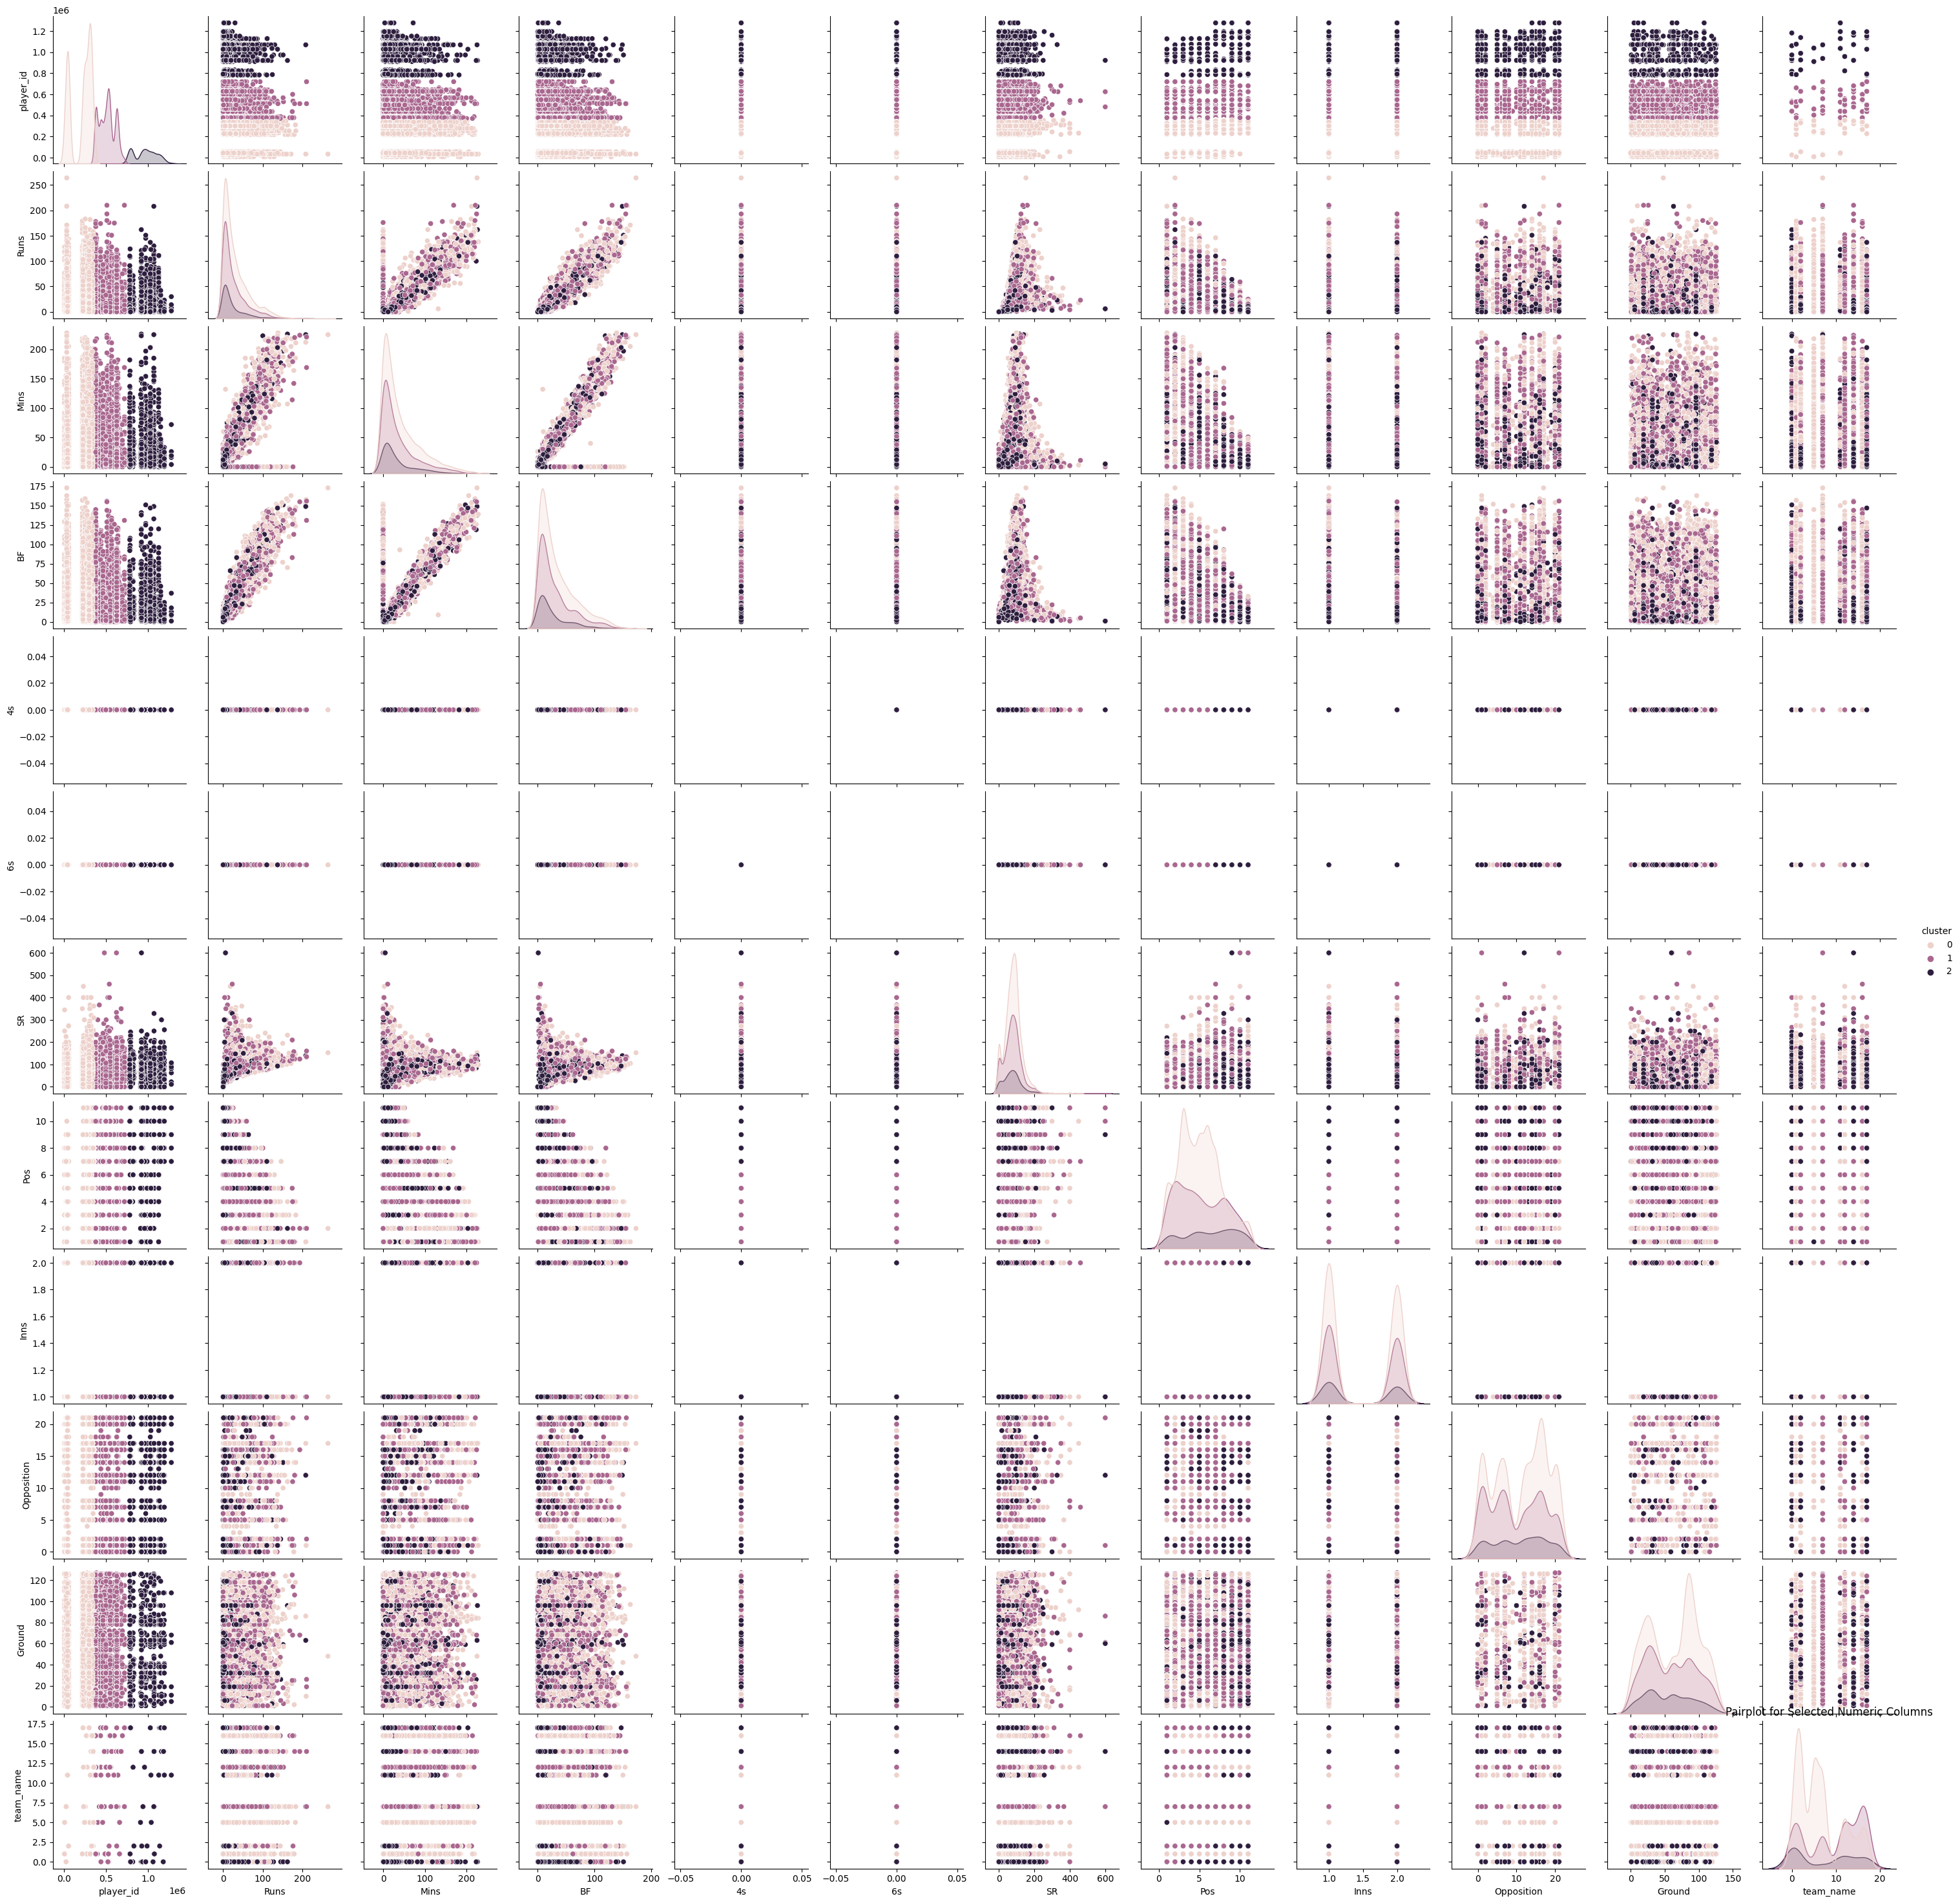

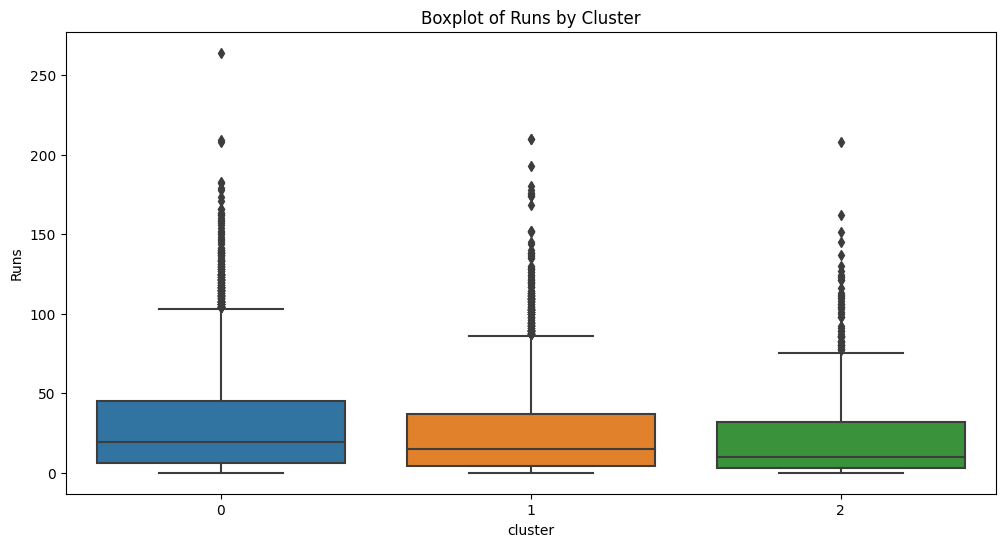

In [35]:
# Pairplot for selected numeric columns
sns.pairplot(batting_df[selected_columns + ['cluster']], hue='cluster')
plt.title('Pairplot for Selected Numeric Columns')
plt.show()

# Boxplot for Runs and SR by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='Runs', data=batting_df)
plt.title('Boxplot of Runs by Cluster')
plt.show()

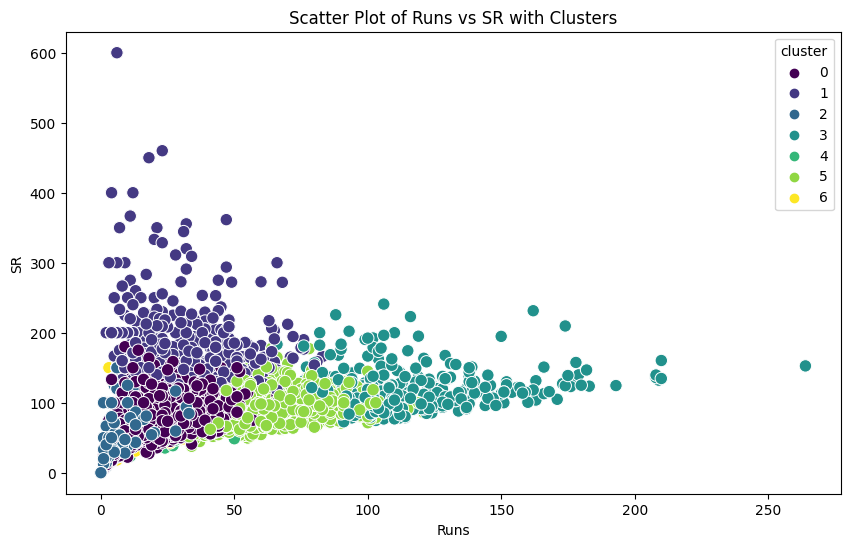

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runs', y='SR', hue='cluster', data=batting_df, palette='viridis', s=80)
plt.title('Scatter Plot of Runs vs SR with Clusters')
plt.xlabel('Runs')
plt.ylabel('SR')
plt.show()


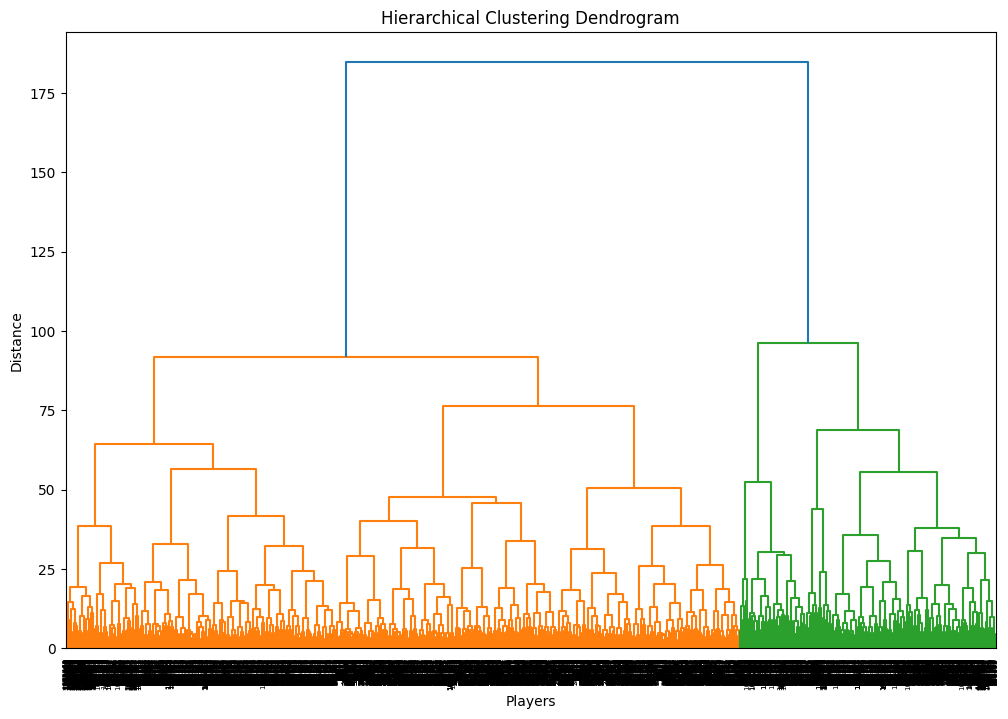

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'batting_df' with the specified columns

# Selecting the columns for hierarchical clustering
selected_columns = ['player_id', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Inns', 'Opposition', 'Ground', 'team_name']

# Handling non-numeric values
batting_df[selected_columns] = batting_df[selected_columns].replace('-', pd.NA)

# Converting to numeric, replacing non-numeric values with NaN
batting_df[selected_columns] = batting_df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Filling NaN values with a specific value (you can adjust this based on your needs)
batting_df[selected_columns] = batting_df[selected_columns].fillna(0)

# Scaling the selected columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(batting_df[selected_columns])

# Hierarchical clustering
linkage_matrix = linkage(df_scaled, method='ward')  # You can choose a different linkage method based on your requirements

# Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=batting_df['player_id'].tolist(), orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Players')
plt.ylabel('Distance')
plt.show()


      player_id  Runs  Mins  BF   4s   6s      SR  Pos  Inns  odi_number  \
0        440970     0   0.0   3  0.0  0.0    0.00    3     2  ODI # 3417   
1        440970    13   0.0  19  0.0  0.0   68.42    5     2  ODI # 3418   
2        440970    38   0.0  67  4.0  0.0   56.71    4     2  ODI # 3487   
3        440970     3   0.0   7  0.0  0.0   42.85    4     1  ODI # 3488   
4        440970    15  21.0  22  2.0  0.0   68.18    4     1  ODI # 3503   
...         ...   ...   ...  ..  ...  ...     ...  ...   ...         ...   
9321     793007     4   7.0   2  1.0  0.0  200.00   11     2  ODI # 4548   
9322     793007     1   6.0   5  0.0  0.0   20.00   11     1  ODI # 4606   
9325     793007     0   2.0   0  0.0  0.0    0.00   11     1  ODI # 4620   
9326     793007     4   4.0   2  1.0  0.0  200.00   11     2  ODI # 4661   
9328     793007     0  12.0   6  0.0  0.0    0.00   11     1  ODI # 4671   

      cluster  
0           0  
1           0  
2           0  
3           1  
4      

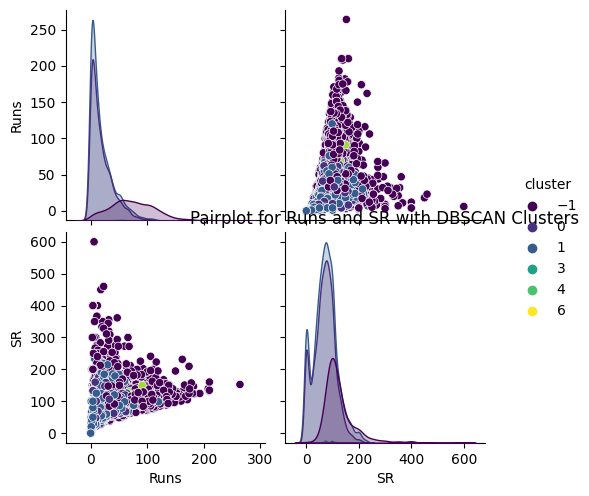

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dataframe named 'batting_df' with the specified columns

# Selecting the columns for DBSCAN clustering
selected_columns = ['player_id', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Inns', 'Opposition', 'Ground', 'team_name']

# Handling non-numeric values
batting_df[selected_columns] = batting_df[selected_columns].replace('-', pd.NA)

# Converting to numeric, replacing non-numeric values with NaN
batting_df[selected_columns] = batting_df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Filling NaN values with a specific value (you can adjust this based on your needs)
batting_df[selected_columns] = batting_df[selected_columns].fillna(0)

# Scaling the selected columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(batting_df[selected_columns])

# DBSCAN clustering
dbscan_model = DBSCAN(eps=1.5, min_samples=5)  # You may need to adjust 'eps' and 'min_samples'
clusters = dbscan_model.fit_predict(df_scaled)

# Add the cluster labels to the original DataFrame
batting_df['cluster'] = clusters

# Display the resulting dataframe with cluster assignments
print(batting_df[['player_id', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Inns', 'odi_number', 'cluster']])

# Visualize the clusters using pairplots
sns.pairplot(batting_df[['Runs', 'SR', 'cluster']], hue='cluster', palette='viridis')
plt.title('Pairplot for Runs and SR with DBSCAN Clusters')
plt.show()


In [76]:
bowling_df = bowling_df.merge(player_data_df, on='player_id', how='left')
bowling_df

player_id overs maidens runs wickets economy position innings  \
0        440970   DNB       -    -       -       -        -       1   
1        440970   DNB       -    -       -       -        -       1   
2        440970   DNB       -    -       -       -        -       1   
3        440970   2.0       0   17       0    8.50        6       2   
4        440970   DNB       -    -       -       -        -       2   
...         ...   ...     ...  ...     ...     ...      ...     ...   
9326     793007  10.0       0   86       2    8.60        2       1   
9327     793007   9.2       0   60       2    6.42        2       2   
9328     793007   9.0       2   38       3    4.22        2       2   
9329     793007   9.4       1   49       4    5.06        1       1   
9330     793007   5.0       0   37       0    7.40        1       1   

      opposition  ground   start_date  odi_number  team_name  \
0              9     109   2 Oct 2013  ODI # 3417          0   
1              9     109   4 Oct 2013  ODI # 3418          0   
2              6      77   1 May 2014  ODI # 3487          0   
3             18      77   2 May 2014  ODI # 3488          0   
4             21      19  18 Jul 2014  ODI # 3503          0   
...          ...     ...          ...         ...        ...   
9326          16      38   7 Oct 2023  ODI # 4661         17   
9327          14      63  10 Oct 2023  ODI # 4665         17   
9328           1      82  16 Oct 2023  ODI # 4671         17   
9329          11      82  21 Oct 2023  ODI # 4676         17   
9330           5      10  26 Oct 2023  ODI # 4682         17   

               player_name  
0     Hashmatullah Shahidi  
1     Hashmatullah Shahidi  
2     Hashmatullah Shahidi  
3     Hashmatullah Shahidi  
4     Hashmatullah Shahidi  
...                    ...  
9326    Dilshan Madushanka  
9327    Dilshan Madushanka  
9328    Dilshan Madushanka  
9329    Dilshan Madushanka  
9330    Dilshan Madushanka  

[9331 rows x 14 columns]

In [77]:
bowling_df.drop(columns=["maidens", "position", "odi_number"], inplace=True)
bowling_df

player_id overs runs wickets economy innings  opposition  ground  \
0        440970   DNB    -       -       -       1           9     109   
1        440970   DNB    -       -       -       1           9     109   
2        440970   DNB    -       -       -       1           6      77   
3        440970   2.0   17       0    8.50       2          18      77   
4        440970   DNB    -       -       -       2          21      19   
...         ...   ...  ...     ...     ...     ...         ...     ...   
9326     793007  10.0   86       2    8.60       1          16      38   
9327     793007   9.2   60       2    6.42       2          14      63   
9328     793007   9.0   38       3    4.22       2           1      82   
9329     793007   9.4   49       4    5.06       1          11      82   
9330     793007   5.0   37       0    7.40       1           5      10   

       start_date  team_name           player_name  
0      2 Oct 2013          0  Hashmatullah Shahidi  
1      4 Oct 2013          0  Hashmatullah Shahidi  
2      1 May 2014          0  Hashmatullah Shahidi  
3      2 May 2014          0  Hashmatullah Shahidi  
4     18 Jul 2014          0  Hashmatullah Shahidi  
...           ...        ...                   ...  
9326   7 Oct 2023         17    Dilshan Madushanka  
9327  10 Oct 2023         17    Dilshan Madushanka  
9328  16 Oct 2023         17    Dilshan Madushanka  
9329  21 Oct 2023         17    Dilshan Madushanka  
9330  26 Oct 2023         17    Dilshan Madushanka  

[9331 rows x 11 columns]

In [78]:
bowling_df['overs'].unique()

array(['DNB', '2.0', '1.0', 'TDNB', '3.0', '5.0', '1.5', '5.3', '6.0',
       '8.0', '4.0', '1.1', '9.0', '10.0', '9.5', '5.1', '7.0', '8.3',
       '9.4', '6.4', '5.2', '7.1', '4.1', '3.5', '8.2', '8.5', '8.1',
       '7.3', '9.2', '4.4', '4.2', '5.4', '9.3', '8.4', '7.2', '7.5',
       '4.5', '1.4', '3.2', '6.1', '6.2', '0.1', '6.5', '2.4', '0.5',
       '5.5', 'sub', '1.3', '3.1', '9.1', '6.3', '1.2', '0.2', '2.3',
       '2.5', '7.4', '0.4', '2.2', '0.3', '3.3', '4.3'], dtype=object)

In [79]:
# We can notice DNB, TDNB, sub in overs. Drop them

bowling_df.drop(bowling_df[bowling_df['overs'].isin(['DNB', 'TDNB', 'sub'])].index, inplace=True)
bowling_df['overs'] = bowling_df['overs'].astype(float)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 3 to 9330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   runs         5171 non-null   object 
 3   wickets      5171 non-null   object 
 4   economy      5171 non-null   object 
 5   innings      5171 non-null   object 
 6   opposition   5171 non-null   int32  
 7   ground       5171 non-null   int32  
 8   start_date   5171 non-null   object 
 9   team_name    5171 non-null   int32  
 10  player_name  5171 non-null   object 
dtypes: float64(1), int32(3), int64(1), object(6)
memory usage: 424.2+ KB


In [80]:
bowling_df['runs'] = bowling_df['runs'].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 3 to 9330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   runs         5171 non-null   int32  
 3   wickets      5171 non-null   object 
 4   economy      5171 non-null   object 
 5   innings      5171 non-null   object 
 6   opposition   5171 non-null   int32  
 7   ground       5171 non-null   int32  
 8   start_date   5171 non-null   object 
 9   team_name    5171 non-null   int32  
 10  player_name  5171 non-null   object 
dtypes: float64(1), int32(4), int64(1), object(5)
memory usage: 404.0+ KB


In [81]:
bowling_df['wickets'] = bowling_df['wickets'].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 3 to 9330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   runs         5171 non-null   int32  
 3   wickets      5171 non-null   int32  
 4   economy      5171 non-null   object 
 5   innings      5171 non-null   object 
 6   opposition   5171 non-null   int32  
 7   ground       5171 non-null   int32  
 8   start_date   5171 non-null   object 
 9   team_name    5171 non-null   int32  
 10  player_name  5171 non-null   object 
dtypes: float64(1), int32(5), int64(1), object(4)
memory usage: 383.8+ KB


In [82]:
bowling_df['economy'] = bowling_df['economy'].astype(float)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 3 to 9330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   runs         5171 non-null   int32  
 3   wickets      5171 non-null   int32  
 4   economy      5171 non-null   float64
 5   innings      5171 non-null   object 
 6   opposition   5171 non-null   int32  
 7   ground       5171 non-null   int32  
 8   start_date   5171 non-null   object 
 9   team_name    5171 non-null   int32  
 10  player_name  5171 non-null   object 
dtypes: float64(2), int32(5), int64(1), object(3)
memory usage: 383.8+ KB


In [83]:
bowling_df['innings'] = bowling_df['innings'].astype(int)
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 3 to 9330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    5171 non-null   int64  
 1   overs        5171 non-null   float64
 2   runs         5171 non-null   int32  
 3   wickets      5171 non-null   int32  
 4   economy      5171 non-null   float64
 5   innings      5171 non-null   int32  
 6   opposition   5171 non-null   int32  
 7   ground       5171 non-null   int32  
 8   start_date   5171 non-null   object 
 9   team_name    5171 non-null   int32  
 10  player_name  5171 non-null   object 
dtypes: float64(2), int32(6), int64(1), object(2)
memory usage: 363.6+ KB


In [84]:
bowling_df

player_id  overs  runs  wickets  economy  innings  opposition  ground  \
3        440970    2.0    17        0     8.50        2          18      77   
12       440970    1.0     8        0     8.00        2          21      61   
129      533956    3.0    10        0     3.33        1          15     109   
130      533956    5.0    22        0     4.40        1          15     109   
131      533956    1.5     7        1     3.81        1           9     109   
...         ...    ...   ...      ...      ...      ...         ...     ...   
9326     793007   10.0    86        2     8.60        1          16      38   
9327     793007    9.2    60        2     6.42        2          14      63   
9328     793007    9.0    38        3     4.22        2           1      82   
9329     793007    9.4    49        4     5.06        1          11      82   
9330     793007    5.0    37        0     7.40        1           5      10   

       start_date  team_name           player_name  
3      2 May 2014          0  Hashmatullah Shahidi  
12    16 Feb 2017          0  Hashmatullah Shahidi  
129    6 Mar 2013          0   Rahmat Shah Zurmati  
130    8 Mar 2013          0   Rahmat Shah Zurmati  
131    2 Oct 2013          0   Rahmat Shah Zurmati  
...           ...        ...                   ...  
9326   7 Oct 2023         17    Dilshan Madushanka  
9327  10 Oct 2023         17    Dilshan Madushanka  
9328  16 Oct 2023         17    Dilshan Madushanka  
9329  21 Oct 2023         17    Dilshan Madushanka  
9330  26 Oct 2023         17    Dilshan Madushanka  

[5171 rows x 11 columns]

In [90]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df=bowling_df

# Select numerical columns for clustering
selected_columns = ['overs', 'runs', 'wickets', 'economy', 'innings']

# Create a pipeline with StandardScaler and KMeans
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=42))

# Fit the pipeline to the selected columns
pipeline.fit(df[selected_columns])

# Add a new column to the DataFrame with the cluster labels
df['cluster'] = pipeline.predict(df[selected_columns])

# Print the DataFrame with cluster labels
print(df)


      player_id  overs  runs  wickets  economy  innings  opposition  ground  \
3        440970    2.0    17        0     8.50        2          18      77   
12       440970    1.0     8        0     8.00        2          21      61   
129      533956    3.0    10        0     3.33        1          15     109   
130      533956    5.0    22        0     4.40        1          15     109   
131      533956    1.5     7        1     3.81        1           9     109   
...         ...    ...   ...      ...      ...      ...         ...     ...   
9326     793007   10.0    86        2     8.60        1          16      38   
9327     793007    9.2    60        2     6.42        2          14      63   
9328     793007    9.0    38        3     4.22        2           1      82   
9329     793007    9.4    49        4     5.06        1          11      82   
9330     793007    5.0    37        0     7.40        1           5      10   

       start_date  team_name           player_name 

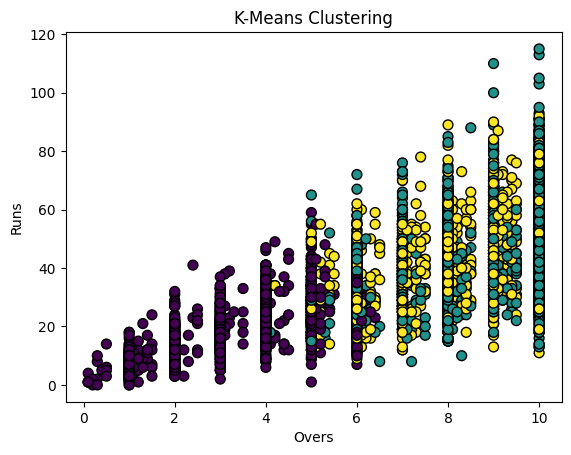

In [91]:
plt.scatter(df['overs'], df['runs'], c=df['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.title('K-Means Clustering')
plt.show()

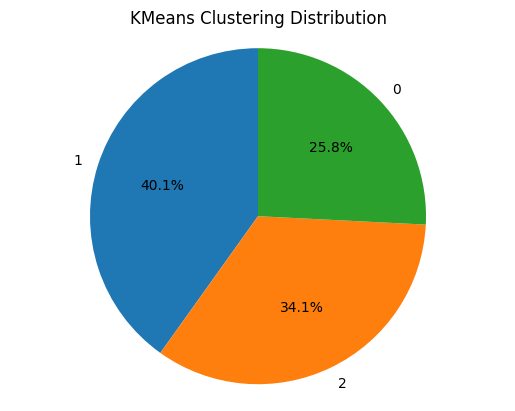

In [92]:
cluster_counts = df['cluster'].value_counts()

# Plot a pie chart
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('KMeans Clustering Distribution')
plt.show()

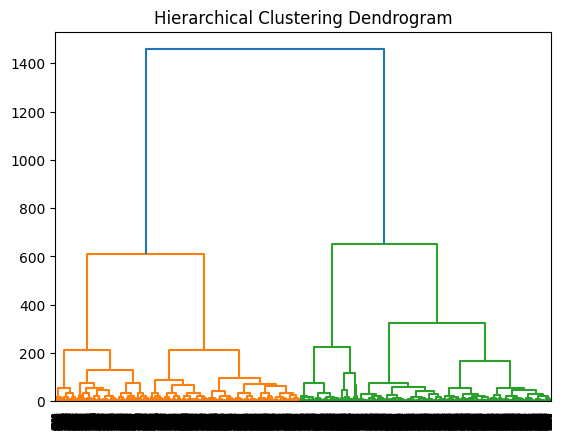

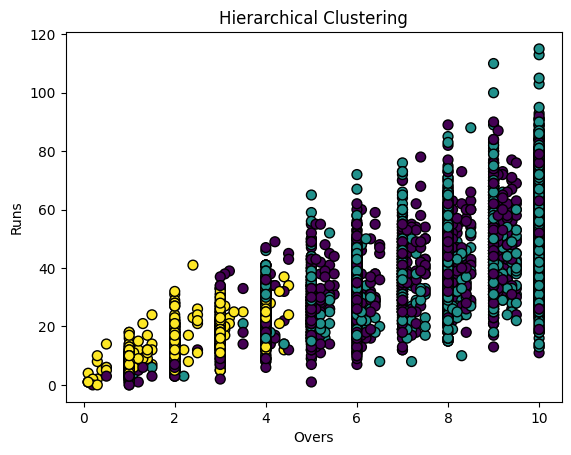

In [94]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

df=bowling_df
# Select numerical columns for clustering
selected_columns = ['overs', 'runs', 'wickets', 'economy', 'innings']

# Create a pipeline with StandardScaler and AgglomerativeClustering
pipeline = make_pipeline(StandardScaler(), AgglomerativeClustering(n_clusters=3))

# Fit the pipeline to the selected columns
df['cluster'] = pipeline.fit_predict(df[selected_columns])

# Dendrogram
linkage_matrix = linkage(df[selected_columns], method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Scatter plot
plt.scatter(df['overs'], df['runs'], c=df['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.title('Hierarchical Clustering')
plt.show()


In [96]:
""

''

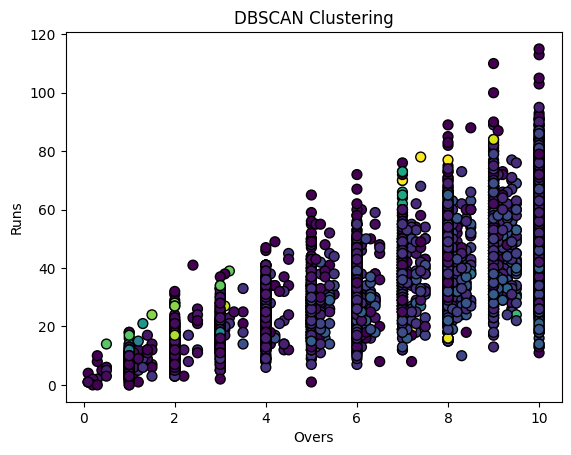

In [93]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified columns
df=bowling_df

# Select numerical columns for clustering
selected_columns = ['overs', 'runs', 'wickets', 'economy', 'innings']

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_columns])

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=3)

# Fit the model and get cluster labels
df['cluster'] = dbscan.fit_predict(df_scaled)

# Scatter plot
plt.scatter(df['overs'], df['runs'], c=df['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.title('DBSCAN Clustering')
plt.show()


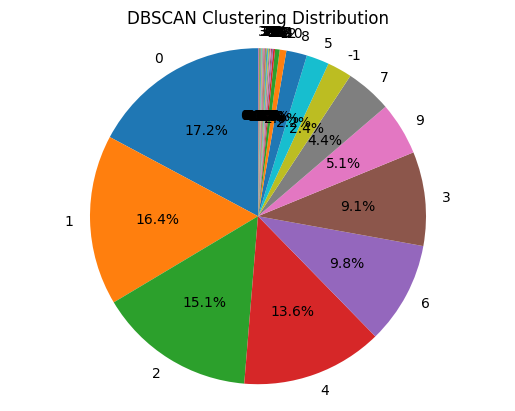

In [89]:
cluster_counts = df['cluster'].value_counts()

# Plot a pie chart
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('DBSCAN Clustering Distribution')
plt.show()